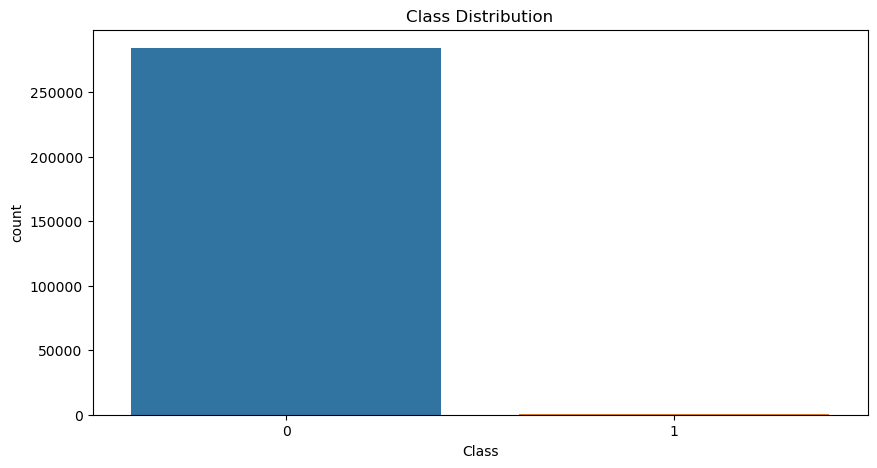

C:\Users\Akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


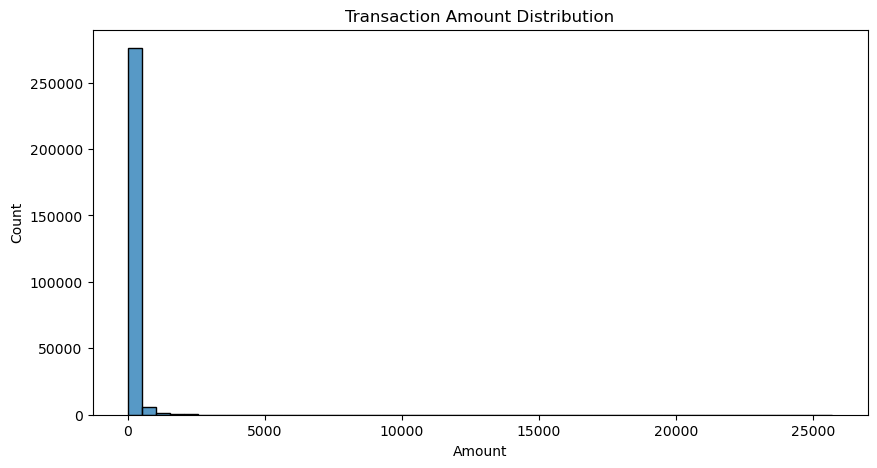

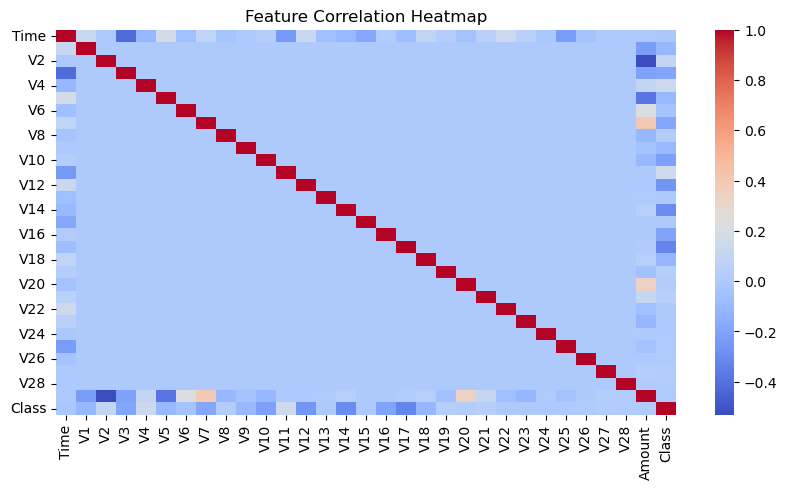

Accuracy Score: 0.973771988343106
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
[[55378  1486]
 [    8    90]]
ROC-AUC Score: 0.9793935476554155


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Data Loading and Cleaning
def load_data(path):
    data = pd.read_csv(path)
    return data

def clean_data(data):
    # Basic cleaning: removing missing values
    data = data.dropna()
    return data

# Data Visualization
def visualize_data(data):
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Class', data=data)
    plt.title('Class Distribution')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(data['Amount'], bins=50)
    plt.title('Transaction Amount Distribution')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
    plt.title('Feature Correlation Heatmap')
    plt.show()

# Feature Engineering
def feature_engineering(data):
    features = data.drop(columns=['Class', 'Time'])
    target = data['Class']
    return features, target

# Model Training and Evaluation
def train_evaluate_model(X_train, X_test, y_train, y_test):
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # Define Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)

    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Calculate and print ROC-AUC score
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC Score:", roc_auc)

# Main script
if __name__ == "__main__":
    # Load and clean data
    data = load_data('creditcard.csv')
    cleaned_data = clean_data(data)
    
    # Visualize data
    visualize_data(cleaned_data)

    # Feature engineering
    X, y = feature_engineering(cleaned_data)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate model
    train_evaluate_model(X_train, X_test, y_train, y_test)
